In [1]:
unzip_path = "./dataset/"

In [2]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
import os
import pandas as pd

data_url = "https://dshare.mathematik.uni-marburg.de/index.php/s/GrPtczNmDZQcn9f/download/training_dataset.zip"

with urlopen(data_url) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall(unzip_path)

print('Dataset extracted to "{:s}"'.format(os.path.realpath(unzip_path)))
df = pd.read_csv('dataset/train.csv', index_col='Id')
df.head(5)

Dataset extracted to "/Users/williamhutchinson/Local_Docs/SEM1/ML_Hackathon/ml_hackathon/dataset"


,Wohngebiet,Nachbarschaft,Bedingung1,Bedingung2,Wohnungsklasse,Gebauedetyp,Wohnungsstil,Baujahr,Umbaujahr,Hausqualitaet,...,Garagenqualitaet,Garagenzustand,EinfahrtGepflastert,Sondermerkmal,SondermerkmalWert,Verkaufsmonat,Verkaufsjahr,Verkaufstyp,Verkaufsbedingung,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,
1,WN,Gallus,Norm,Norm,20,1Fam,1Sto,1962,1962,3,...,Du,Ar,J,NaN,0.0,7,2019,GarK,Normal,69700.0
2,WN,Gallus,Norm,Norm,20,1Fam,1Sto,2015,2016,5,...,Du,Du,J,NaN,0.0,6,2017,GarK,Normal,133450.0
3,WN,Eckenhe,Norm,Norm,50,1Fam,2Sto,1930,1960,6,...,Du,Du,P,NaN,0.0,9,2016,GarK,Normal,165750.0
4,WN,Ginnhei,Norm,Norm,60,1Fam,2Sto,2009,2010,6,...,Du,Du,J,NaN,0.0,5,2017,GarK,Normal,157250.0
5,WN,Eckenhe,Norm,Norm,70,1Fam,2Sto,1939,1960,8,...,Du,Du,J,NaN,0.0,6,2016,GarK,Normal,195500.0


In [3]:
features = df.columns[:-1]
features_20_1, features_20_2, features_20_3, features_19_4 = features[:20], features[20:40], features[40:60], features[60:]

df_20_1 = pd.concat([df[features_20_1], df['Verkaufspreis']], axis=1)
df_20_2 = pd.concat([df[features_20_2], df['Verkaufspreis']], axis=1)
df_20_3 = pd.concat([df[features_20_3], df['Verkaufspreis']], axis=1)
df_20_4 = pd.concat([df[features_19_4], df['Verkaufspreis']], axis=1)

In [10]:
pd.options.display.max_rows = 85
pd.options.display.max_columns = 85
df_20_3.describe(include='all')

,OberirdischeWohnflaeche,1Stockflaeche,2Stockflaeche,GeringequalitaetFlaeche,OberirdischeRaueme,Funktionalitaet,OberirdischeVollbadezimmer,OberirdischeHalbbadezimmer,Schlafzimmer,Kuechen,KuechenQualitaet,Kamine,Kaminqualitaet,Heizung,Heizungsqualitaet,Klimalanlage,Elektrik,Holzdeckflaeche,OffeneVerandaflaeche,GeschlosseneVerandaflaeche,Verkaufspreis
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,1998,2000.000000,2000.000000,2000.000000,2000.000000,1999,2000.000000,1040,2000,2000,2000,1999,2000.000000,2000.000000,2000.000000,2000.00000
unique,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,4,NaN,5,5,5,2,5,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Typ,NaN,NaN,NaN,NaN,Du,NaN,Gu,GasWO,Ag,J,SLSRo,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,1864,NaN,NaN,NaN,NaN,1034,NaN,527,1971,1024,1865,1827,NaN,NaN,NaN,NaN
mean,135.531945,104.294025,30.785310,0.45261,6.466000,NaN,1.572000,0.378000,2.867500,1.042500,NaN,0.603500,NaN,NaN,NaN,NaN,NaN,8.575200,4.269735,2.126205,153708.42060
std,46.068902,35.585721,38.841752,4.32349,1.558223,NaN,0.548604,0.498237,0.815645,0.204242,NaN,0.647686,NaN,NaN,NaN,NaN,NaN,11.506873,5.952831,6.010000,68822.30926
min,36.630000,36.630000,0.000000,0.00000,3.000000,NaN,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,10870.65000
25%,101.767500,78.907500,0.000000,0.00000,5.000000,NaN,1.000000,0.000000,2.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,109650.00000
50%,129.645000,97.290000,0.000000,0.00000,6.000000,NaN,2.000000,0.000000,3.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,2.430000,0.000000,136000.00000
75%,156.442500,124.380000,63.360000,0.00000,7.000000,NaN,2.000000,1.000000,3.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,15.120000,6.300000,0.000000,181475.00000


# Analyze William

## Oberirdirsche Wohnflaeche

In [5]:
import matplotlib.pyplot as plt


def plot_feature(df, feature):
    plt.figure(figsize=(10, 5))
    plt.scatter(df[feature], df['Verkaufspreis'])
    plt.xlabel(feature)
    plt.ylabel('Verkaufspreis')
    plt.show()

In [6]:
def plot_all_features(df):
    plt.figure(figsize=(20, 20))
    for i, feature in enumerate(df.columns):
        try:
            plt.subplot(5, 4, i+1)
            plt.scatter(df[feature], df['Verkaufspreis'])
            plt.xlabel(feature)
            plt.ylabel('Verkaufspreis')
        except:
            pass
    plt.show()

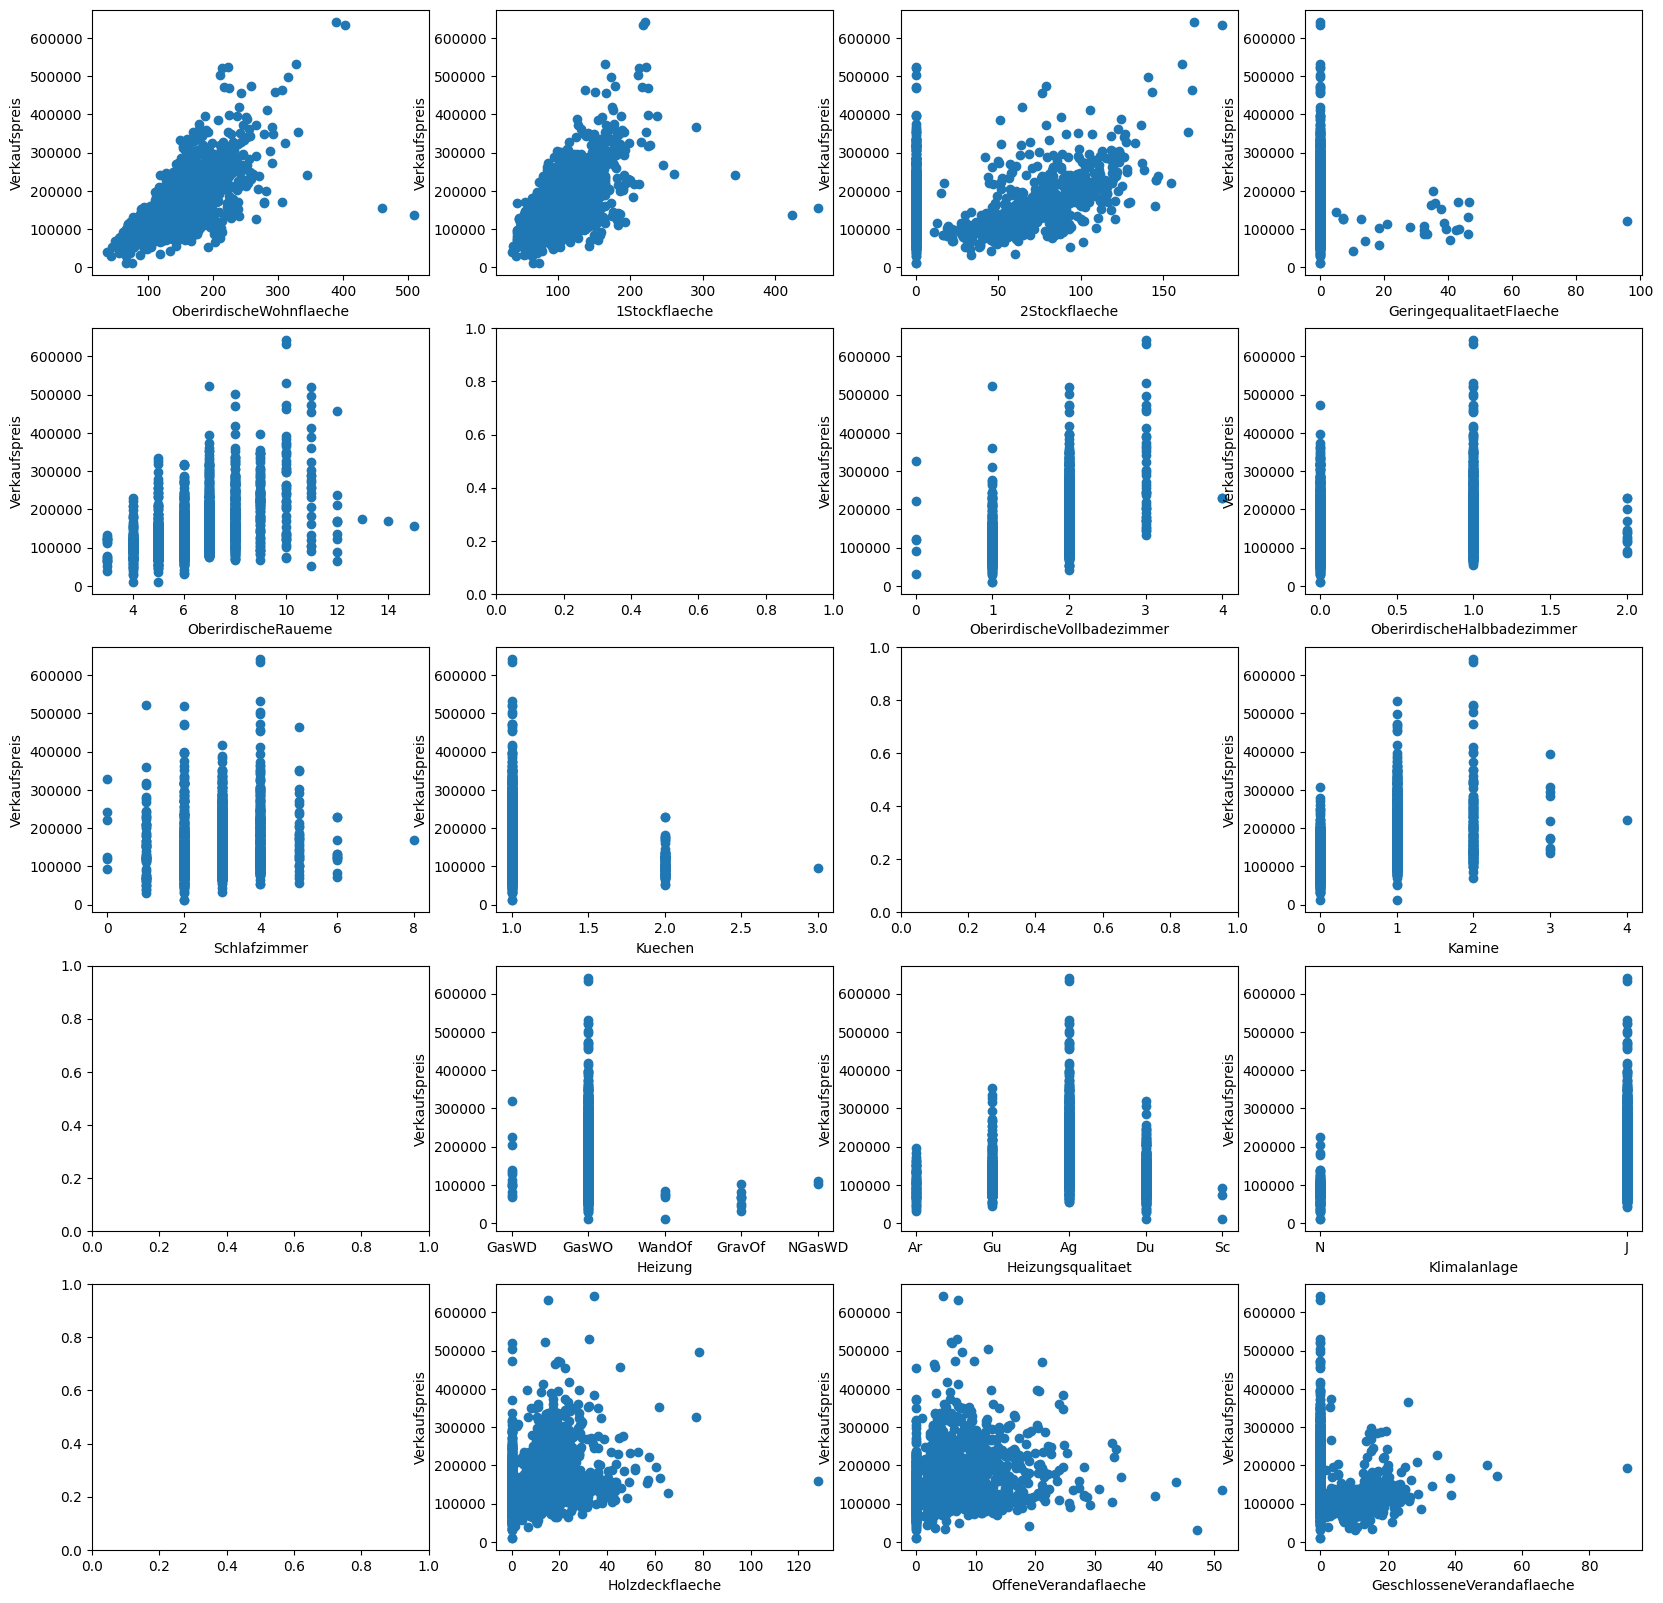

In [7]:
plot_all_features(df_20_3)

In [8]:
df_20_3[df_20_3['OberirdischeWohnflaeche'].isnull()]

,OberirdischeWohnflaeche,1Stockflaeche,2Stockflaeche,GeringequalitaetFlaeche,OberirdischeRaueme,Funktionalitaet,OberirdischeVollbadezimmer,OberirdischeHalbbadezimmer,Schlafzimmer,Kuechen,KuechenQualitaet,Kamine,Kaminqualitaet,Heizung,Heizungsqualitaet,Klimalanlage,Elektrik,Holzdeckflaeche,OffeneVerandaflaeche,GeschlosseneVerandaflaeche,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,
